# ECBM 4040 Fall 2020 FINAL PROJECT 

### Author:

Wenjun Yang (wy2347)   

Qihang Yang (qy2231)

In [1]:
# Autoreload
%load_ext autoreload
%autoreload 2

In [2]:
# You do not need to run this
import sys
sys.path.append("/home/ecbm4040/anaconda3/envs/envTF22/lib/python3.7/site-packages")
sys.path

['/home/ecbm4040/ECBM4040-Final-Project',
 '/home/ecbm4040/anaconda3/envs/envTF22/lib/python37.zip',
 '/home/ecbm4040/anaconda3/envs/envTF22/lib/python3.7',
 '/home/ecbm4040/anaconda3/envs/envTF22/lib/python3.7/lib-dynload',
 '',
 '/home/ecbm4040/anaconda3/envs/envTF22/lib/python3.7/site-packages',
 '/home/ecbm4040/anaconda3/envs/envTF22/lib/python3.7/site-packages/IPython/extensions',
 '/home/ecbm4040/.ipython',
 '/home/ecbm4040/anaconda3/envs/envTF22/lib/python3.7/site-packages']

In [3]:
import numpy as np
import tensorflow as tf

In [4]:
from utils.prep import *
from utils.model import *
from utils.visualizeMIDI import *

## Step 1: Extract the midi data from zip file.

* the data we use in this project comes from [Classical Piano Midi Page](http://www.piano-midi.de/) 
* all of them are midi file containing two tracks of piano for left hand and right hand


In [ ]:
## you don't have to run this block

# import zipfile
# with zipfile.ZipFile('data/midifile.zip', 'r') as zip_ref:
#     zip_ref.extractall('data/')

## Step 2: Prepare data for training

#### A little insight about the input data structure
The input data proposed by the original paper is a little bit complex and requires some knowledge about music. \
For more information on background knowledge of music, you can refer to the following two links:
* [MIDI_events](https://www.mixagesoftware.com/en/midikit/help/HTML/midi_events.html#:~:text=The%20Note%20Off%20Event%20is,hard%20the%20key%20was%20released.) 
* [MIDI Turtorial](http://www.music-software-development.com/midi-tutorial.html) 

We spend quite a lot time trying to figure out the whole logic behind this and provide the following glossary table for your information.\
And for consistency, we will stick to the name convention stated in the original paper.

* stateMatrix: matrix of state, for state definition see below
* note: 0-77 lower_bound=24; upper_bound=102 
* part_position(1) = note
* pitchclass = 1 of 12 half steps CDEFGAB b#
* part_pitchclass(12): one-hot pitchclass 
* state: (1,0) (1,1) (0,0) -> denoting holding or repeating a note
* context: the count of each pitchclass played in last timestep 
* part_context(12): rearranged context
* part_prev_proximity(50):

#### Note:
* input for model: part_position + part_pitchclass + part_prev_vicinity + part_context + beat + [0] 
* total number of arguments: 1 + 12 + 50 + 12 + 4 + 1 = 80
* for each of the 78 note you have 80 arguments in above structure
* and we only use sequences of 128 timesteps for training
* so the input data form will be 128 X 78 X 80

Please refer to prep.py for the details of implementation of data preprocessing part.

The general data preparation process is as the following flowchart:
<img src="image/Data Prep.png" />


In [5]:
training_data = load_data('data/music')

load liz_et2
load scn16_3
load haydn_43_1
load mendel_op30_3
load beethoven_les_adieux_1
load br_rhap
load grieg_zwerge
load haydn_7_1
load muss_8
load schu_143_2
load muss_4
load scn68_12
load clementi_opus36_1_1
load waldstein_3
load liz_et_trans5
load ty_maerz
load ty_juli
load rac_op3_2
load chpn-p3
load gra_esp_4
load scn15_5
load beethoven_opus10_2
load grieg_wedding
load mz_330_1
load haydn_35_2
load chpn_op27_1
load schubert_D935_3
load mendel_op19_4
load schub_d960_1
load haydn_9_1
load mz_545_1
load rac_op33_6
load liz_rhap15
load alb_esp2
load grieg_berceuse
load rac_op23_2
load bach_850
load beethoven_opus22_1
load burg_quelle
load debussy_cc_4
load schubert_D850_4
load chpn-p4
load mendel_op30_1
load pathetique_3
load clementi_opus36_6_1
load mendel_op62_3
load schu_143_1
load chpn_op25_e11
load scn15_4
load schub_d960_4
load mz_570_3
load clementi_opus36_5_1
load scn15_13
load grieg_waechter
load chpn-p8
load brahms_opus1_2
load rac_op32_1
load liz_et_trans4
load haydn_8_

## (Optional) Step 3: Train the theano-based model

In [5]:
# from Original.ori_prep import *
# from Original.ori_multi_training import *
# from Original.ori_model import *

In [6]:
# pcs = loadPieces("data/music")

# m = Model([300,300],[100,50], dropout=0.5)

Loaded liz_et2
Loaded scn16_3
Loaded haydn_43_1
Loaded mendel_op30_3
Loaded beethoven_les_adieux_1
Loaded br_rhap
Loaded grieg_zwerge
Loaded haydn_7_1
Loaded muss_8
Loaded schu_143_2
Loaded muss_4
Loaded scn68_12
Loaded clementi_opus36_1_1
Loaded waldstein_3
Loaded liz_et_trans5
Loaded ty_maerz
Loaded ty_juli
Loaded rac_op3_2
Loaded chpn-p3
Loaded gra_esp_4
Loaded scn15_5
Loaded beethoven_opus10_2
Loaded grieg_wedding
Loaded mz_330_1
Loaded haydn_35_2
Loaded chpn_op27_1
Loaded schubert_D935_3
Loaded mendel_op19_4
Loaded schub_d960_1
Loaded haydn_9_1
Loaded mz_545_1
Loaded rac_op33_6
Loaded liz_rhap15
Loaded alb_esp2
Loaded grieg_berceuse
Loaded rac_op23_2
Loaded bach_850
Loaded beethoven_opus22_1
Loaded burg_quelle
Loaded debussy_cc_4
Loaded schubert_D850_4
Loaded chpn-p4
Loaded mendel_op30_1
Loaded pathetique_3
Loaded clementi_opus36_6_1
Loaded mendel_op62_3
Loaded schu_143_1
Loaded chpn_op25_e11
Loaded scn15_4
Loaded schub_d960_4
Loaded mz_570_3
Loaded clementi_opus36_5_1
Loaded scn1

INFO (theano.gof.compilelock): Waiting for existing lock by process '2762' (I am process '7173')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/ecbm4040/.theano/compiledir_Linux-5.4--gcp-x86_64-with-debian-buster-sid-x86_64-3.7.6-64/lock_dir
/home/ecbm4040/E4040/Project/ECBM4040-Final-Project/Original/ori_model.py:380: UserWarning: Updating an `OrderedUpdates` with a non-ordered dictionary with 2+ elements could make your code non-deterministic
  self.walk_input: next_input
/home/ecbm4040/E4040/Project/ECBM4040-Final-Project/Original/ori_model.py:383: UserWarning: Updating an `OrderedUpdates` with a non-ordered dictionary with 2+ elements could make your code non-deterministic
  updates.update({hidden:newstate for hidden, newstate, layer in zip(self.walk_hiddens, new_states, self.time_model.layers) if has_hidden(layer)})


In [ ]:
# trainPiece(m, pcs, 100) 

## Step 4: Our Work

### 4.1 Workflow

The general workflow of our project is as follows:
<img src="image/workflow.png" />


We train our model which is written in tensorflow and keras, predict and generate music based on our model, then compare our output music with the products of the original paper.\
Our methodology generally follows a similar pattern with the original paper, but also differs in several ways. To start with, our project uses tensorflow and keras to implement the paper while the original paper is based on theano. Also, with limited time and computing resources, we only manage to train the model for 1050 epochs in contrast to 10000 epochs in the original paper, that might cause huge differences in the output. To see the exact architecture we are using and details of training, please refer to section 4.2 and 4.3.

### 4.2 Model

#### The Bi-axial model
The Bi-axial model proposed by the original paper stacks LSTM first in time axis then in note axis. The first two layers are independent in notes, but have connection across time. The last two layers are connected in the note axis while independent across time. Its structure is displayed in the below picture, note the loop means delay by one time step.
<img src="image/architecture.png" />
This structure is aimed at capturing the intrinsic feature of model, that is time-dependence, note-invariance and chord.

#### The Software Implementation:
The tensorflow/Keras implementation of our model is as the below diagram.
Note that our model involves 2 transpose layers in order to change the structure of input data into the form that caters to the time-distributed layers. Also note even though we have two separate layers in the diagram, in practice, we combine these 2 together and form a single input layer.
<img src="image/model.png" />
For code please refer to model.py

### 4.3 Training (No need to run this section)
We train our model for 1050 epochs with 20 steps for each epoch and 10 samples for each step, each sample is of length 128 time steps according to the original paper. We use Adam optimizer with a learning rate of 5e-5 and a custom loss function calculating the negative log likelihood of our output against the true state matrix of note being played next time step.


Details about loss function:\
Because that the prediction is probability, we create our loss function by modified on the binary entropy:
$$ C = -\frac{1}{TN} \sum_{t=1}^T \sum_{n=1}^N \ln [v_n^{(t)}q^{(n,t)} + (1 - v_n^{(t)})(1 - q^{(n,t)})] $$
where q(n,t) represent the prediction of p(t)(vn=1|v<n). 


In [11]:
model = music_gen()

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(5e-5),loss= my_loss)

In [11]:
model.build(input_shape = (None, 127, 78, 82)) # Training shape
# model.summary()
filepath="models/model-epoch-{epoch:02d}.h5"
save_callback=tf.keras.callbacks.ModelCheckpoint(filepath,  
                                              verbose=0, save_best_only=False, 
                                              save_weights_only=True, period=50)

In [12]:
data_gen=update_input_batch_generator(training_data)
model.fit_generator(data_gen,epochs=600,steps_per_epoch=20,callbacks=[save_callback])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - 39s 2s/step - loss: 256.2800
Epoch 2/10
20/20 [==============================] - 42s 2s/step - loss: 162.4976
Epoch 3/10
20/20 [==============================] - 40s 2s/step - loss: 142.0483
Epoch 4/10
20/20 [==============================] - 40s 2s/step - loss: 150.6520
Epoch 5/10
20/20 [==============================] - 42s 2s/step - loss: 145.4117
Epoch 6/10
20/20 [==============================] - 40s 2s/step - loss: 142.9249
Epoch 7/10
20/20 [==============================] - 40s 2s/step - loss: 150.3253
Epoch 8/10
20/20 [==============================] - 42s 2s/step - loss: 136.0461
Epoch 9/10
20/20 [==============================] - 40s 2s/step - loss: 144.8250
Epoch 10/10
20/20 [==============================] - 40s 2s/step - loss: 141.8763


Note: you can find the model from the last epoch in model folder.

### 4.4 Predition and Music generation
After the model is built and trained, our next step is to use the prediction of our model to generate original music pieces. We randomly select a music piece in our training data and use its first 127 timesteps as a starting data to make a prediction. The prediction is the probability of the state matrix to be positive of the note at time step 128. We create a uniformly random variable and compare it with the probability to derive an actual state matrix of this note. We transfer the state matrix to the input data type and concatenate it to our starting data, and select the last 127 timesteps as our new training data. Keep it on and we can continually generate a long list of data. Choose the ideal length of the data matrix and transfer it back to a midi file, we finally generate an original music piece.

In [41]:
model = music_gen()

In [44]:
model.build(input_shape = (None, 127, 78, 82)) 
model.load_weights("model/model-epoch-1050.h5")

We use a more visually appealing way to to show the music generated. To see the code of visualization part, please refer to visualizeMIDI.py. Below is a random music piece generated by our model, you can find the MIDI file under samples folder.\
We will also generate a piece of music from initial model with random initialztion, to show the improvement we have in music generation.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

sample_prob_new.mid saved


/home/ecbm4040/anaconda3/envs/envTF22/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


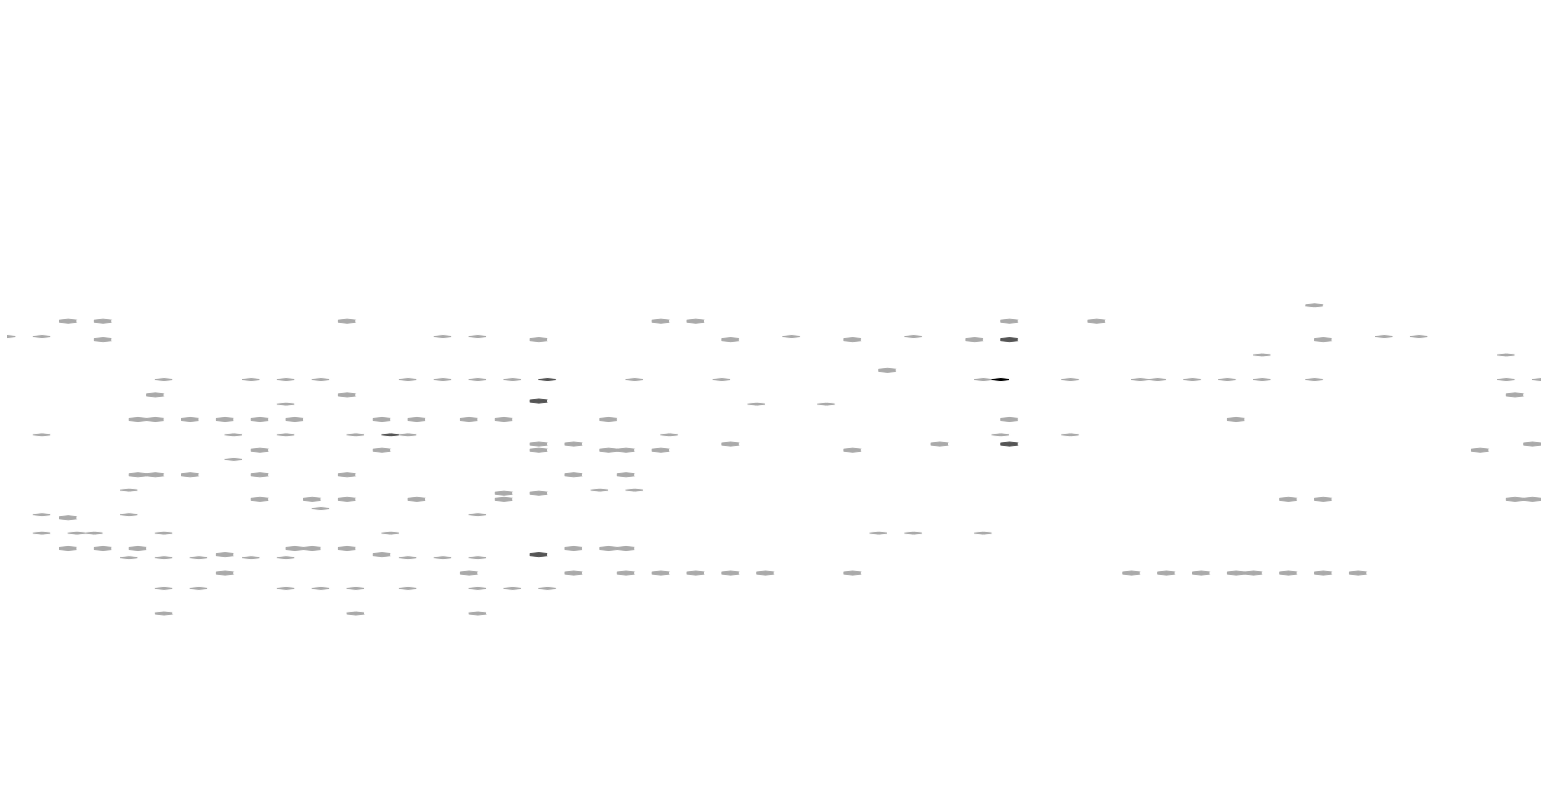

In [45]:
# Parameters:
# # starting_data: randomly choose a starting_data from training_data
# # length: the length of music to be composed,
# # name: file name

starting_data = build_single_input(training_data) 

model.compose(starting_data, length = 100, name = "sample_prob_new")

mid=midi.read_midifile('samples/sample_prob_new.mid')
visualize_midi(mid)

#### Model with Random Initialization

In [46]:
model=music_gen()
model.build(input_shape = (None, 127, 78, 82))
starting_data = build_single_input(training_data) 
model.compose(starting_data, length = 100, name = "sample_prob_random")


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

sample_prob_random.mid saved


midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[24, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[27, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[29, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[32, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[38, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[40, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[41, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[42, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[43, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[45, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[49, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[50, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[52, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[53, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[54, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[57, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[58, 40]),
   

/home/ecbm4040/anaconda3/envs/envTF22/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


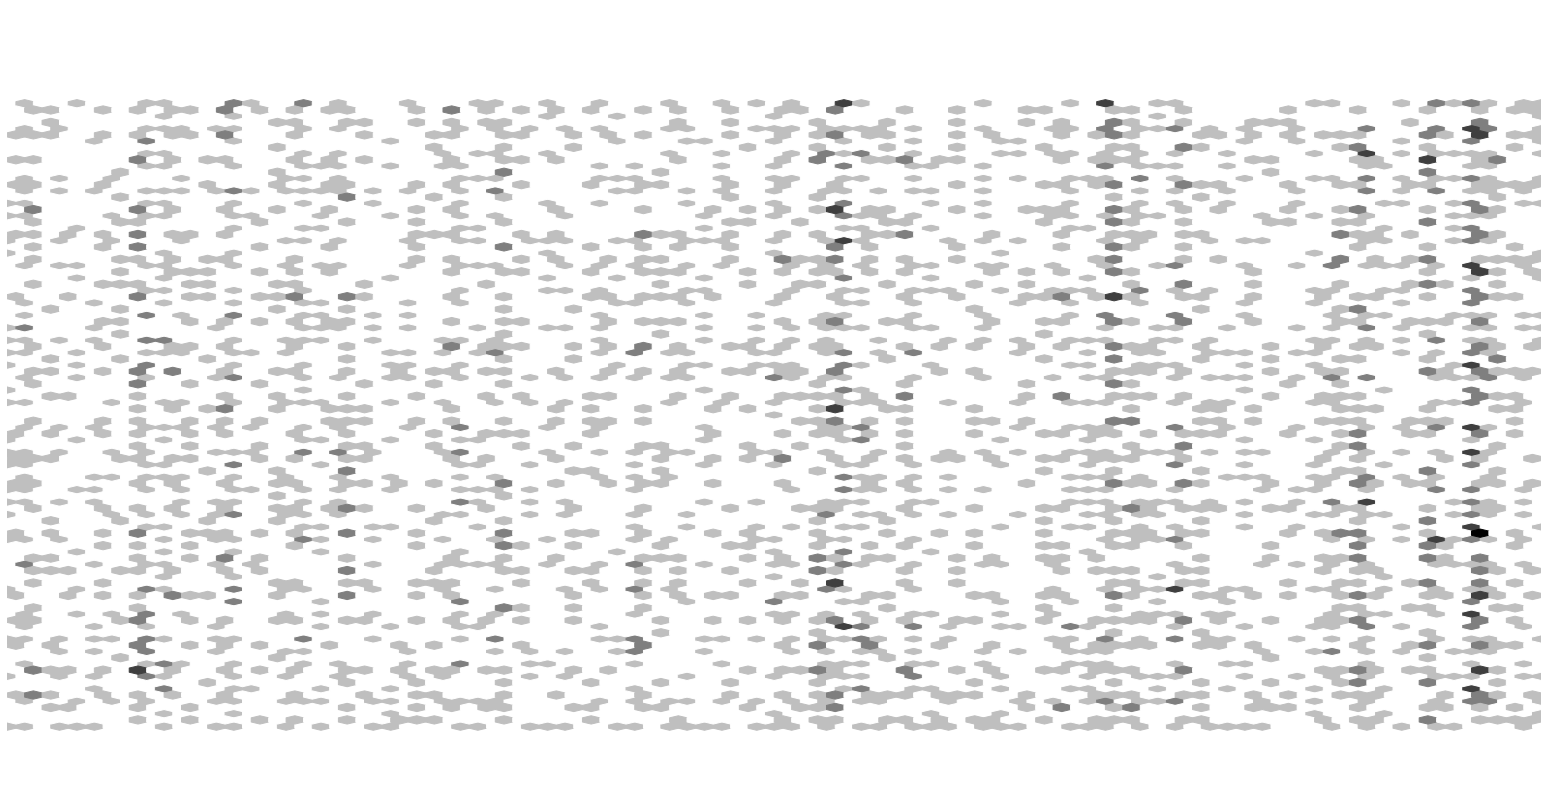

In [36]:
mid=midi.read_midifile('samples/sample_prob_random.mid')
visualize_midi(mid)

From the two picture above, we could see that the model really learn the dependency between the time steps and notes based on the fact that they are much less haphazard and notes often come in as pairs which compose chords. And try listening, you can see more improvement. 

### Step 5: Difference 

### Step 7: Unsolved problems and Drawbacks

1. The model doesn't include factors like velocity and tempo, which makes the generated music somewhat plain and lacking in style.
2. The model requires a lot of hand-picked arguments based on empirical knowledge about music.
3. The model only deals with single instrument. If we simply run the model on different instruments and then combine each track together, this sure won't give us a good melody. How to make these intruments sound good together could be an interesting task.